In [18]:
import pandas as pd

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [9]:
X_train = pd.read_csv("X_train.csv", index_col="PassengerId")
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,1,0,0.271174,0.125,0.0,0.014151,1
2,-1,1,0.472229,0.125,0.0,0.139136,-1
3,1,1,0.321438,0.000,0.0,0.015469,1
4,-1,1,0.434531,0.125,0.0,0.103644,1
5,1,0,0.434531,0.000,0.0,0.015713,1


In [10]:
y_train = pd.read_csv("y_train.csv", index_col="PassengerId")
y_train.head()

,Survived
PassengerId,
1,0
2,1
3,1
4,1
5,0


In [13]:
print(X_train.shape)

(889, 7)


In [42]:
model = Sequential()
model.add(Dense(14, activation='relu', input_shape=(7,)))
model.add(Dropout(0.3))
model.add(Dense(14, activation='relu', ))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', patience=5)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [48]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[es])

Epoch 1/100
23/23 [==============================] - 0s 3ms/step - loss: 0.4406 - accuracy: 0.8143 - val_loss: 0.4080 - val_accuracy: 0.8315
Epoch 2/100
23/23 [==============================] - 0s 2ms/step - loss: 0.4492 - accuracy: 0.8045 - val_loss: 0.4060 - val_accuracy: 0.8315
Epoch 3/100
23/23 [==============================] - 0s 1ms/step - loss: 0.4454 - accuracy: 0.8115 - val_loss: 0.4050 - val_accuracy: 0.8315
Epoch 4/100
23/23 [==============================] - 0s 2ms/step - loss: 0.4496 - accuracy: 0.8045 - val_loss: 0.4045 - val_accuracy: 0.8371
Epoch 5/100
23/23 [==============================] - 0s 2ms/step - loss: 0.4455 - accuracy: 0.7947 - val_loss: 0.4023 - val_accuracy: 0.8371
Epoch 6/100
23/23 [==============================] - 0s 2ms/step - loss: 0.4424 - accuracy: 0.8073 - val_loss: 0.4064 - val_accuracy: 0.8371
Epoch 7/100
23/23 [==============================] - 0s 2ms/step - loss: 0.4385 - accuracy: 0.8087 - val_loss: 0.4078 - val_accuracy: 0.8371
Epoch 8/100
2

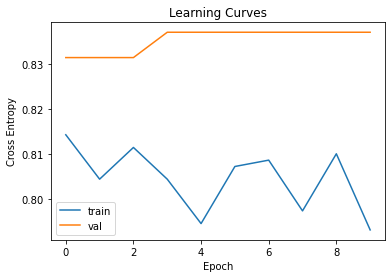

In [49]:
from matplotlib import pyplot

pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='val')
pyplot.legend()
pyplot.show()

In [50]:
model.save("titanic_model")

INFO:tensorflow:Assets written to: titanic_model\assets


In [55]:
X_test = pd.read_csv("X_test.csv", index_col="PassengerId")

y_predict = model.predict(X_test)

y_predict[0][0]

0.1863501

In [39]:
X_test.iloc[0]

Pclass      1.000000
Sex         0.000000
Age         0.452723
SibSp       0.000000
Parch       0.000000
Fare        0.015282
Embarked    0.000000
Name: 892, dtype: float64

In [67]:
submit = pd.DataFrame(columns = ['PassengerId', 'Survived'])


submit.head

<bound method NDFrame.head of Empty DataFrame
Columns: [PassengerId, Survived]
Index: []>

In [79]:
n=892
while n<1310:
    submit = submit.append({'PassengerId': n, 'Survived': round(y_predict[n-892][0])}, ignore_index=True)
    n+=1

In [82]:
submit.head

<bound method NDFrame.head of             Survived
PassengerId         
892                0
893                0
894                0
895                0
896                0
...              ...
1305               0
1306               1
1307               0
1308               0
1309               0

[418 rows x 1 columns]>

In [81]:
submit = submit.set_index('PassengerId')

In [83]:
submit.to_csv('submit.csv')